### Контекст проекта
  Краудфандинговая платформа kiva.org ставит своей целью предоставление финансовых услуг наиболее нуждающимся и необеспеченным людям. Заёмщики оставляют заявку на сайте, доноры поддерживают её финансово, на месте партнёр организации выдаёт кредит, который погашается из этих средств, которые донорам возвращаются уже заёмщиками через платформу.
Представленный компанией датасет содержит информацию о займах на различные проекты в 85 разных странах.

### Декомпозиция

* Очистка и подготовка данных:
  * Обработайте данные, оцените наличие пропусков, дубликатов и выбросов
  * Преобразуйте столбцы в подходящие типы данных (например, datetime).
  * Произведите первичное знакомство с датасетом: изучите распределение данных и сводную статистику.<br><br>

* Скорость анализа сбора средств:
  * Рассчитайте время, которое было затрачено на сбор средств по каждой заявке
  * Проанализируйте распределение времени сбора средств с помощью описательной статистики и визуализаций, в том числе в разрезе имеющихся в датасете категорий.
  * Определите факторы, которые могут повлиять на скорость сбора средств, такие как сумма кредита, сектор, деятельность, партнер или страна.
  * Проведите статистический тест, чтобы подтвердить ваши выводы<br><br>

* Анализ заявок и индекса бедности:
  * Аггрегируйте данные по заявкам в разрезе стран, сохраняя информацию о средних и суммарных показателях (необходимо будет определить для характеристик, какой вид аггрегации к ним подходит)
  * Объедините данные индекса бедности по странам с получившимся набором данных Kiva.
  * Проанализируйте взаимосвязь между темой заявки (столбец activity или sector) и индексом бедности страны.
  * Определите сектора и темы заявок, которые более распространены в странах с более высокими индексами бедности.
  * Оцените представленность заявок из бедных стран в наборе кредитных данных Kiva, определите страны, в которых Kiva недопредставлена, на основе частоты выдачи кредитов.<br><br>

> Дополнительные исследования

* Распределение женщин-заемщиков в разных странах и религиях:
  * Постройте визуализации, которые будут показывать как связана основная религия страны и доли женщин-заёмщиков
  * Выясните, существует ли между переменными значительная связь: проведите статистические тесты (например, критерий хи-квадрат)<br><br>

* Партнёрские отношения Kiva в регионах
  * На основе столбца partner_id изучите количество партнёров Kiva в разных странах; равномерность распределения сумм кредитов среди партнёров; частоту и объем случаев, когда партнеры выдают кредиты до полного финансирования
  * Визуализируйте результаты с помощью диаграмм или графиков<br><br>

* При анализе заявок и индекса бедности можно обогатить аггрегированную по странам таблицу данными о численности населения, чтобы углубить исследование и выводы.

### Загрузка данных

In [ ]:
# библиотеки для работы с табличными данными
import numpy as np
import pandas as pd
import seaborn as sb

# библиотеки для...
# import

In [ ]:
                                                          # сводный индекс бедности
mpi_index = {
 'Afghanistan':0.27172124, 'Albania':0.00274788, 'Algeria':0.0054091, 'Angola':0.28243506, 'Argentina':0.0014693,
 'Armenia':0.000690069007857107, 'Azerbaijan':0.021,'Bangladesh':0.1040603, 'Belize':0.01710883, 'Benin':0.36767483,
 'Bolivia':0.0377543, 'Botswana':0.0726387, 'Burundi':0.408861094240289,
 'Cameroon':0.2320601, 'Central African Republic':0.4613475, 'Chad':0.5170112, 'Chile':0.207, 'Colombia':0.01965727,
 'Congo':0.3311887, 'Costa Rica':0.0020063, 'Cote D\'Ivoire':0.235871,
 'Cuba':0.0026887, 'Dominican Republic':0.0087862, 'Ecuador':0.0079374, 'Ethiopia':0.3666042, 'Gambia':0.1980231,
 'Georgia':0.0012446, 'Ghana':0.1112183, 'Guinea':0.3732216, 'Guinea-Bissau':0.3406887, 'Guyana':0.0065924,
 'Haiti':0.1995877, 'Honduras':0.0511542, 'India':0.0688106, 'Indonesia':0.0140107, 'Iraq':0.03269432,
 'Israel':None,'Jamaica':0.0108103, 'Jordan':0.00152592, 'Kiribati':0.0801574, 'Kyrgyzstan':0.001426,
 'Lao People\'s Democratic Republic':0.10833325, 'Lebanon':0.531,'Lesotho':0.0843592, 'Liberia':0.2592937, 'Madagascar':0.3839745,
 'Malawi':0.2310952, 'Maldives':0.00265409, 'Mali':0.3760629, 'Mauritania':0.3270372, 'Mexico':0.0280538,
 'Mongolia':0.0281268, 'Montenegro':0.0048989, 'Morocco':0.0266967, 'Myanmar (Burma)':0.17584623, 'Nepal':0.0743989,
 'Nigeria':0.2543896, 'North Macedonia':0.0014221, 'Pakistan':0.1982474, 'Palestine':0.0019801, 'Panama':0.191,
 'Papua New Guinea':0.2632909, 'Paraguay':0.01884858, 'Peru':0.0292211, 'Philippines':0.02424934, 'Rwanda':0.231002,
 'Samoa':0.0246005, 'Sao Tome and Principe':0.0479234, 'Senegal':0.262862, 'Serbia':0.0004331, 'Seychelles':0.0029635,
 'Sierra Leone':0.2928993, 'Somalia':0.514,'South Africa':0.02489064, 'Sri Lanka':0.0111847, 'Suriname':0.0112325,
 'Tajikistan':0.02900592, 'Tanzania':0.284179310669258, 'Thailand':0.0021207, 'Timor-Leste':0.221514240070676,
 'Togo':0.1796163, 'Tonga':0.0033362, 'Tunisia':0.0028877, 'Turkmenistan':0.0008492, 'Turkey':0.028,
 'Tuvalu':0.0080846, 'Uganda':0.281028478426768, 'Vietnam':0.0077294, 'Zambia':0.2316851, 'Zimbabwe':0.1099418,
 'Barbados':0.00852886, 'Bhutan':0.17486399, 'Bosnia and Herzegovina':0.0083075, 'Brazil':0.01634604,
 'Burkina Faso':0.523424279357662, 'Cambodia':0.17034812, 'China':0.0160667, 'Comoros':0.18077141,
 'The Democratic Republic of the Congo':0.1116763,
 'Egypt':0.0196817970481763, 'El Salvador':0.03246251, 'Eswatini (Kingdom of)':0.08127132, 'Gabon':0.0696953622816103,
 'Guatemala':0.13351782, 'Kazakhstan':0.00161063266199911, 'Kenya':0.170776074964141, 'Libya':0.00742146512493491,
 'Moldova':0.00353391, 'Mozambique':0.416955412151251, 'Namibia':0.184734534885262,
 'Nicaragua':0.0744948916698962, 'Niger':0.601279812220296, 'Saint Lucia':0.00720186, 'South Sudan':0.58015746,
 'Sudan':0.2794396, 'Trinidad and Tobago':0.00241792, 'Vanuatu':0.129,'Ukraine':0.000840431758839254,
 'Yemen':0.245166461457986 }

def lookup(df:pd.DataFrame) -> None:
    '''Функция для получения базовой информации о датафрейме'''
    print('Dataset shape',df.shape,"example:")
    display(df.dropna().sample().T)
    for col in df.columns:
        n = df[col].nunique()
        if n < 15:
            display(df[col].value_counts(dropna=False).to_frame().T.style.format("{:_.0f}"))
        elif np.issubdtype(df[col].dtype, np.number):
            print(f"{col} — {n} values. Min {df[col].min():_.0f}, avg: {df[col].mean():_.1f}, max: {df[col].max():_.0f}")
        else:
            print(f"{col} — {n} values. Min {df[col].dropna().min()}, max: {df[col].dropna().max()}")

In [ ]:
df = pd.read_csv('/content/sample_data/kiva.csv', low_memory=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622633 entries, 0 to 622632
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     622633 non-null  int64  
 1   funded_amount          622633 non-null  float64
 2   loan_amount            622633 non-null  float64
 3   activity               622633 non-null  object 
 4   sector                 622633 non-null  object 
 5   use                    619310 non-null  object 
 6   country_code           622625 non-null  object 
 7   country                622633 non-null  object 
 8   region                 574127 non-null  object 
 9   currency               622633 non-null  object 
 10  partner_id             611522 non-null  float64
 11  posted_time            622633 non-null  object 
 12  disbursed_time         622633 non-null  object 
 13  funded_time            622633 non-null  object 
 14  term_in_months         622633 non-nu

In [ ]:
# исследуем датасет
lookup(df)

Dataset shape (622633, 21) example:


,390776
id,1062502
funded_amount,200.0
loan_amount,200.0
activity,Home Appliances
sector,Personal Use
use,To buy a water filter to provide safe drinking...
country_code,KH
country,Cambodia
region,Kampot
currency,KHR


id — 622633 values. Min 653_047, avg: 990_100.5, max: 1_340_316
funded_amount — 475 values. Min 25, avg: 798.3, max: 100_000
loan_amount — 475 values. Min 25, avg: 798.3, max: 100_000
activity — 163 values. Min Adult Care, max: Wholesale
sector — 15 values. Min Agriculture, max: Wholesale
use — 391213 values. Min To buy chicken., max: ” provide a safer and more secure living environment for his family by allowing him to purchase new windows for his home through an affordable loan.
country_code — 84 values. Min AF, max: ZW
country — 85 values. Min Afghanistan, max: Zimbabwe
region — 12359 values. Min "The first May" village, max: İZMİT
currency — 67 values. Min ALL, max: ZWD
partner_id — 363 values. Min 9, avg: 178.5, max: 535
posted_time — 619611 values. Min 2014-01-01 04:49:26+00:00, max: 2017-07-25 06:14:08+00:00
disbursed_time — 5698 values. Min 2013-12-02 08:00:00+00:00, max: 2017-09-28 07:00:00+00:00
funded_time — 497853 values. Min 2014-01-01 12:18:55+00:00, max: 2017-07-26 0

,monthly,irregular,bullet,weekly
repayment_interval,311_560,250_376,60_095,602


date — 1296 values. Min 2014-01-01, max: 2017-07-25


,Christians,Muslims,Buddhists,Hindus,Folk Religions,Jews,Unaffiliated
main_country_religion,463_343,99_881,37_578,11_628,9_880,190,133


### Очистка и подготовка данных

Перед тем, как мы начнем предобработку данных, следует прояснить, что означает каждый столбец и что нужно будет с ним сделать. \
**id** - уникальный номер заявки \
**funded_amount** - собранная сумма \
**loan_amount** - запрошенная сумма \
**term_in_month** - срок кредитования \
**repayment_interval** - периодичность платежа \
**currency** - курс валюты \
**sector** - сектор \
**activity** - описание ситуации \
**use** - описание проекта \
**tags** - теги, связанные непосредственно с сайтом \
**disbursed_time** - время предоставления кредита \
**posted_time** - время появления заявки на сайте \
**funded_time** - время сбора денежных средств \
**country_code** - код страны \
**country** - страна \
**region** - регион \
**main_country_religion** - основная религия страны \
**partner_id** - кто выдавал кредит \
**lender_count** - количество кредиторов \
**borrower_genders** - пол заемщиков


In [ ]:
print(sorted(df['partner_id'].unique()))

[9.0, 15.0, 59.0, 61.0, 63.0, 78.0, 81.0, 87.0, 93.0, 96.0, 98.0, 100.0, 106.0, 108.0, 110.0, 113.0, 116.0, 117.0, 122.0, 123.0, 126.0, 137.0, 138.0, 139.0, 140.0, 145.0, 154.0, 164.0, 166.0, 167.0, 177.0, 182.0, 183.0, 190.0, 199.0, 201.0, 203.0, 204.0, 205.0, 231.0, 241.0, 244.0, 245.0, 247.0, 249.0, 334.0, nan, 23.0, 26.0, 30.0, 40.0, 42.0, 44.0, 48.0, 55.0, 56.0, 57.0, 58.0, 62.0, 65.0, 71.0, 74.0, 77.0, 80.0, 82.0, 85.0, 97.0, 104.0, 105.0, 111.0, 112.0, 115.0, 118.0, 119.0, 120.0, 121.0, 125.0, 127.0, 129.0, 130.0, 131.0, 133.0, 136.0, 143.0, 144.0, 146.0, 148.0, 150.0, 151.0, 156.0, 157.0, 159.0, 160.0, 161.0, 162.0, 163.0, 165.0, 169.0, 171.0, 172.0, 173.0, 175.0, 176.0, 181.0, 184.0, 185.0, 187.0, 188.0, 198.0, 202.0, 207.0, 210.0, 211.0, 212.0, 213.0, 215.0, 216.0, 217.0, 218.0, 219.0, 222.0, 225.0, 226.0, 227.0, 228.0, 229.0, 230.0, 237.0, 238.0, 239.0, 240.0, 242.0, 243.0, 246.0, 253.0, 257.0, 258.0, 259.0, 260.0, 261.0, 262.0, 263.0, 264.0, 265.0, 268.0, 269.0, 271.0, 273.

In [ ]:
print(df['tags'].unique())

[nan 'user_favorite, user_favorite' '#Elderly, #Woman Owned Biz' ...
 '#Single Parent, #Animals, #Parent, user_favorite, #Biz Durable Asset, #Woman Owned Biz, user_favorite'
 '#Woman Owned Biz, #Biz Durable Asset, #Repeat Borrower, #Fabrics'
 'volunteer_pick, #Single Parent, #Parent, #Repeat Borrower']


Исходя из информации о данных, видно, что имеются пропуски в следующих столбцах: \
use - подробное описание проекта. Для статистического исследования данная информация не представляет интереса. Можно оставить пустым, заполнить прочерками или вообще удалить.\
country_code - можно заполнить, используя название страны. \
region - в целом, тоже малоинтересная информация, учитывая, что исследование привязано к странам, а не к штатам и областям. Также можно оставить пустым, заполнить прочерками или удалить. \
partner_id - видно, что есть пропуски, стоит их заполнить единицами, так как единицы как раз не хватает в наборе данных. \
tags - теги, по которым можно найти тот или иной пост. Можно заполнить логически. Исходя из тематики вопроса, но большого смысла в этом нет, так как они указаны через запятую и вместо них можно использовать фильтр по темам. \
borrower_genders - пол заемщиков, заполнить невозможно, так как заемщиками могут быть люди любого пола, и пропуски связаны с тем, что люди не захотели указывать пол или не заметили поле с выбором пола.

In [ ]:
print(df.loc[df['country_code'].isna()]['country'])

191118    Namibia
191379    Namibia
321897    Namibia
327947    Namibia
394618    Namibia
394830    Namibia
454439    Namibia
454867    Namibia
Name: country, dtype: object


Код страны отсутствует только у Намибии. Это сильно упрощает задачу. Пропуски можно заполнить одним значением. Тем не менее, стоит узнать, что же означают эти коды. Выберем какую-нибудь стану, например Камбоджу, и узнаем ее код.

In [ ]:
print(df.loc[df['country']== 'Cambodia']['country_code'])

60        KH
64        KH
91        KH
108       KH
125       KH
          ..
621837    KH
621840    KH
622168    KH
622270    KH
622364    KH
Name: country_code, Length: 33464, dtype: object


Видно, что код страны - сокращенное буквенное обозначение стран. У Намибии официальным кодом является абревиатура NA. Прежде, чем заполнять пропуски, убедимся, что данный код ни у кого не встречается.

In [ ]:
print(df.loc[df['country_code'] == 'NA']['country'])

Series([], Name: country, dtype: object)


Совпадений не обнаружено, поэтому можно смело заполнять пропуски в столбце.

In [ ]:
df['country_code'] = df['country_code'].fillna('NA')
print(df.loc[df['country_code'].isna()]['country'])

Series([], Name: country, dtype: object)


Пропуски в столбце успешно заполнены. То же самое следует сделать со столбцом partner_id. А затем снова взглянем на данные, чтобы определиться, что делать дальше.

In [ ]:
df['partner_id'] = df['partner_id'].fillna(1)
print(df.loc[df['partner_id'].isna()]['partner_id'])

Series([], Name: partner_id, dtype: float64)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622633 entries, 0 to 622632
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     622633 non-null  int64  
 1   funded_amount          622633 non-null  float64
 2   loan_amount            622633 non-null  float64
 3   activity               622633 non-null  object 
 4   sector                 622633 non-null  object 
 5   use                    619310 non-null  object 
 6   country_code           622633 non-null  object 
 7   country                622633 non-null  object 
 8   region                 574127 non-null  object 
 9   currency               622633 non-null  object 
 10  partner_id             622633 non-null  float64
 11  posted_time            622633 non-null  object 
 12  disbursed_time         622633 non-null  object 
 13  funded_time            622633 non-null  object 
 14  term_in_months         622633 non-nu

Заполним все остальное фразой 'No description'.

In [ ]:
df['use'] = df['use'].fillna('No description')
print(df.loc[df['use'].isna()]['use'])

Series([], Name: use, dtype: object)


In [ ]:
df['region'] = df['region'].fillna('No description')
print(df.loc[df['region'].isna()]['region'])

Series([], Name: region, dtype: object)


In [ ]:
df['tags'] = df['tags'].fillna('No description')
print(df.loc[df['tags'].isna()]['tags'])

Series([], Name: tags, dtype: object)


In [ ]:
df['borrower_genders'] = df['borrower_genders'].fillna('No description')
print(df.loc[df['borrower_genders'].isna()]['borrower_genders'])

Series([], Name: borrower_genders, dtype: object)


Все пропуски заполнены, посмотрим еще раз на данные и проверим наличие дубликатов, а затем, после их обработки, попытаемся подкорректировать форматы столбцов. Проверку на наличие дубликатов будем смотреть по столбцу id, так как во всех остальных столбцах данные могут повторяться.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622633 entries, 0 to 622632
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     622633 non-null  int64  
 1   funded_amount          622633 non-null  float64
 2   loan_amount            622633 non-null  float64
 3   activity               622633 non-null  object 
 4   sector                 622633 non-null  object 
 5   use                    622633 non-null  object 
 6   country_code           622633 non-null  object 
 7   country                622633 non-null  object 
 8   region                 622633 non-null  object 
 9   currency               622633 non-null  object 
 10  partner_id             622633 non-null  float64
 11  posted_time            622633 non-null  object 
 12  disbursed_time         622633 non-null  object 
 13  funded_time            622633 non-null  object 
 14  term_in_months         622633 non-nu

In [ ]:
df['id'].duplicated().sum()

0

В данных отсутствуют дубликаты. Искать дубликаты через другие столбцы не имеет смысла, даже если все данные совпадают, то это еще не означает, что это просто совпадение. Столбец partner_id стоит перевести в int. Кроме того, следует перевести во временной формат столбцы, связанные с датами.

In [ ]:
df['partner_id'] = df['partner_id'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622633 entries, 0 to 622632
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     622633 non-null  int64  
 1   funded_amount          622633 non-null  float64
 2   loan_amount            622633 non-null  float64
 3   activity               622633 non-null  object 
 4   sector                 622633 non-null  object 
 5   use                    622633 non-null  object 
 6   country_code           622633 non-null  object 
 7   country                622633 non-null  object 
 8   region                 622633 non-null  object 
 9   currency               622633 non-null  object 
 10  partner_id             622633 non-null  int64  
 11  posted_time            622633 non-null  object 
 12  disbursed_time         622633 non-null  object 
 13  funded_time            622633 non-null  object 
 14  term_in_months         622633 non-nu

In [ ]:
df['posted_time'] = df['posted_time']

In [ ]:
df['posted_time'] = pd.to_datetime(df['posted_time'], format = '%Y-%m-%d %H:%M:%S')
df['disbursed_time'] = pd.to_datetime(df['disbursed_time'], format = '%Y-%m-%d %H:%M:%S')
df['funded_time'] = pd.to_datetime(df['funded_time'], format = '%Y-%m-%d %H:%M:%S')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622633 entries, 0 to 622632
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   id                     622633 non-null  int64              
 1   funded_amount          622633 non-null  float64            
 2   loan_amount            622633 non-null  float64            
 3   activity               622633 non-null  object             
 4   sector                 622633 non-null  object             
 5   use                    622633 non-null  object             
 6   country_code           622633 non-null  object             
 7   country                622633 non-null  object             
 8   region                 622633 non-null  object             
 9   currency               622633 non-null  object             
 10  partner_id             622633 non-null  int64              
 11  posted_time            622633 non-null 

In [ ]:
df['term_in_months'] = df['term_in_months'].astype(int)

In [ ]:
print(df['borrower_genders'].sort_values().unique())

['No description' 'female' 'female, female' ...
 'male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male'
 'male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male'
 'male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male']


Данный столбец содержит текст, поэтому поработаем с ним позже.

In [ ]:
df['repayment_interval']

0         irregular
1         irregular
2            bullet
3         irregular
4           monthly
            ...    
622628      monthly
622629      monthly
622630      monthly
622631      monthly
622632      monthly
Name: repayment_interval, Length: 622633, dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d %H:%M:%S')
df['date']

0        2014-01-01
1        2014-01-01
2        2014-01-01
3        2014-01-01
4        2014-01-01
            ...    
622628   2017-07-21
622629   2017-07-21
622630   2017-07-22
622631   2017-07-24
622632   2017-07-25
Name: date, Length: 622633, dtype: datetime64[ns]

Посчитаем количество мужчин и женщин в каждой заявке, чтобы затем можно было использовать данную информацию для более глубокого анализа.

In [ ]:
df['male'] = df['borrower_genders'].str.count('male')-df['borrower_genders'].str.count('female') #вычитаем количество женщин, так как male встречается в обоих полах
df['female'] = df['borrower_genders'].str.count('female')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622633 entries, 0 to 622632
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   id                     622633 non-null  int64              
 1   funded_amount          622633 non-null  float64            
 2   loan_amount            622633 non-null  float64            
 3   activity               622633 non-null  object             
 4   sector                 622633 non-null  object             
 5   use                    622633 non-null  object             
 6   country_code           622633 non-null  object             
 7   country                622633 non-null  object             
 8   region                 622633 non-null  object             
 9   currency               622633 non-null  object             
 10  partner_id             622633 non-null  int64              
 11  posted_time            622633 non-null 

Все данные привведены к приемлему формату для работы с ними. В следующем шаге будем проводить статистический аналаз данных. Для начала, можно взглянуть на распределение по разным странам, по разным суммам кредитования, по соотношению мужчин и женщин и другим показателям.

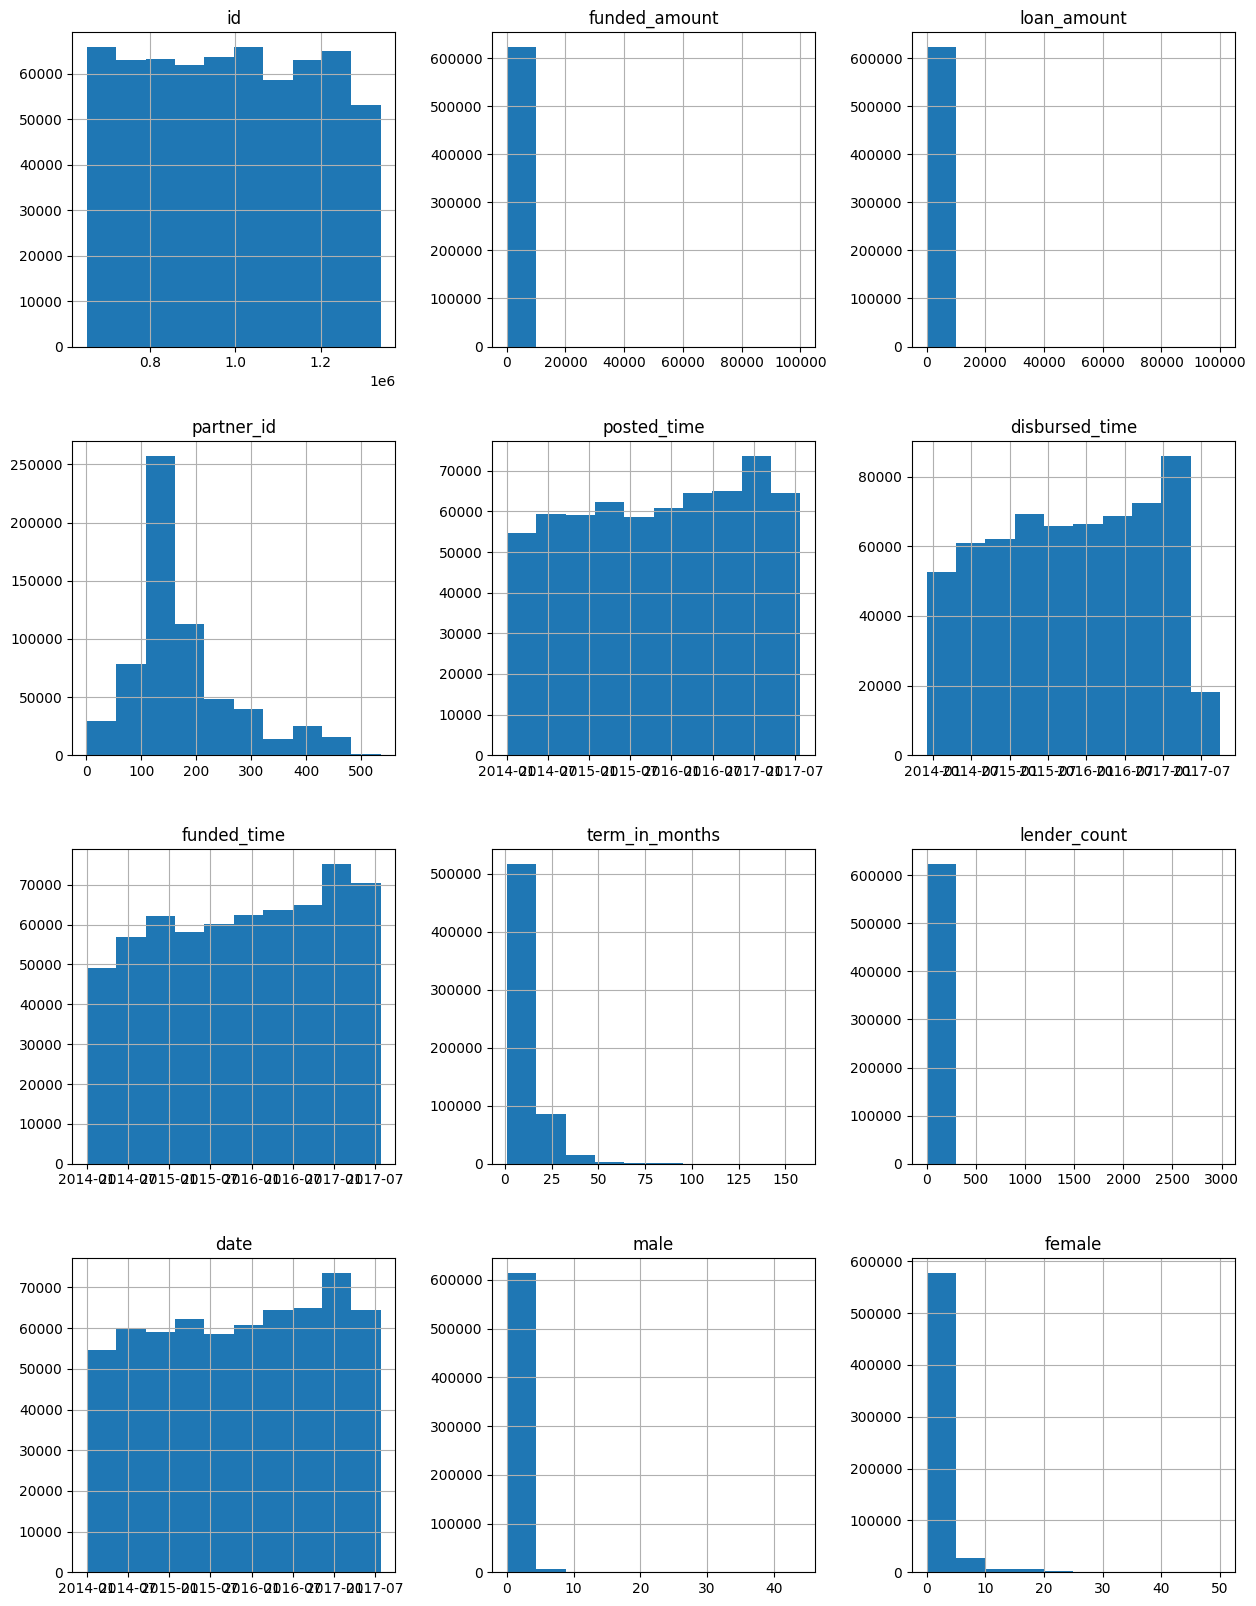

In [ ]:
df.hist(figsize = (15, 20));

Все числовые данные визуализировались в виде столбчатых диаграмм. Уже можно делать определенные выводы касательно состава данных. Начнем по порядку. \
ID пользователей нас мало интересует, так как это случайный набор цифр \
funded amount - сразу видно, что очень редко запрашивают сумму свыше 100 тыс. долларов. Это объясняется тем, что платформа не предназначена для сбора средств для крупного бизнеса и градообразующих предприятий. Да и для  финансирования крупных проектов нужно большое количество инвесторов. \
loan amount - не может отличаться от founded amount, так как по условию все заявки закрыты и сумма собрана полностью.
partner_id - видно, что группа партнеров, чей id находится в промежутке от 100 до 200 более активно принимают участие в финансировании проектов. Не исключено, что они могут финансировать более мелкие провекты, и из-за этого при всех равных их оказалось больше. \
Время появления заявки, сбора средств и выдачи кредита практически не отличаются, есть небольшие различия, связанные с тем, что деньги могут быть выданы до того, как появилась заявка. \
Срок выдачи кредита - в общемировой практике кредит выдается примерно на 3 года. Это оптимальный срок для небольших проектов и окупаемости бизнеса. \
Столбцы с количеством женщин и мужчин в заявках почти не отличаются. Но если обратить внимание, то видно, что женщины чаще участвуют в групповых заявках, где женщин может быть до 25 человек, в то время как мужчины в заявке чаще всего либо единственные, либо их количество не превышает 5 человек.

Теперь можно взглянуть на данные в разрезе стран, секторов, периодичности платежей, а также основной религии. Воспользуемся для этого пивот таблицами.

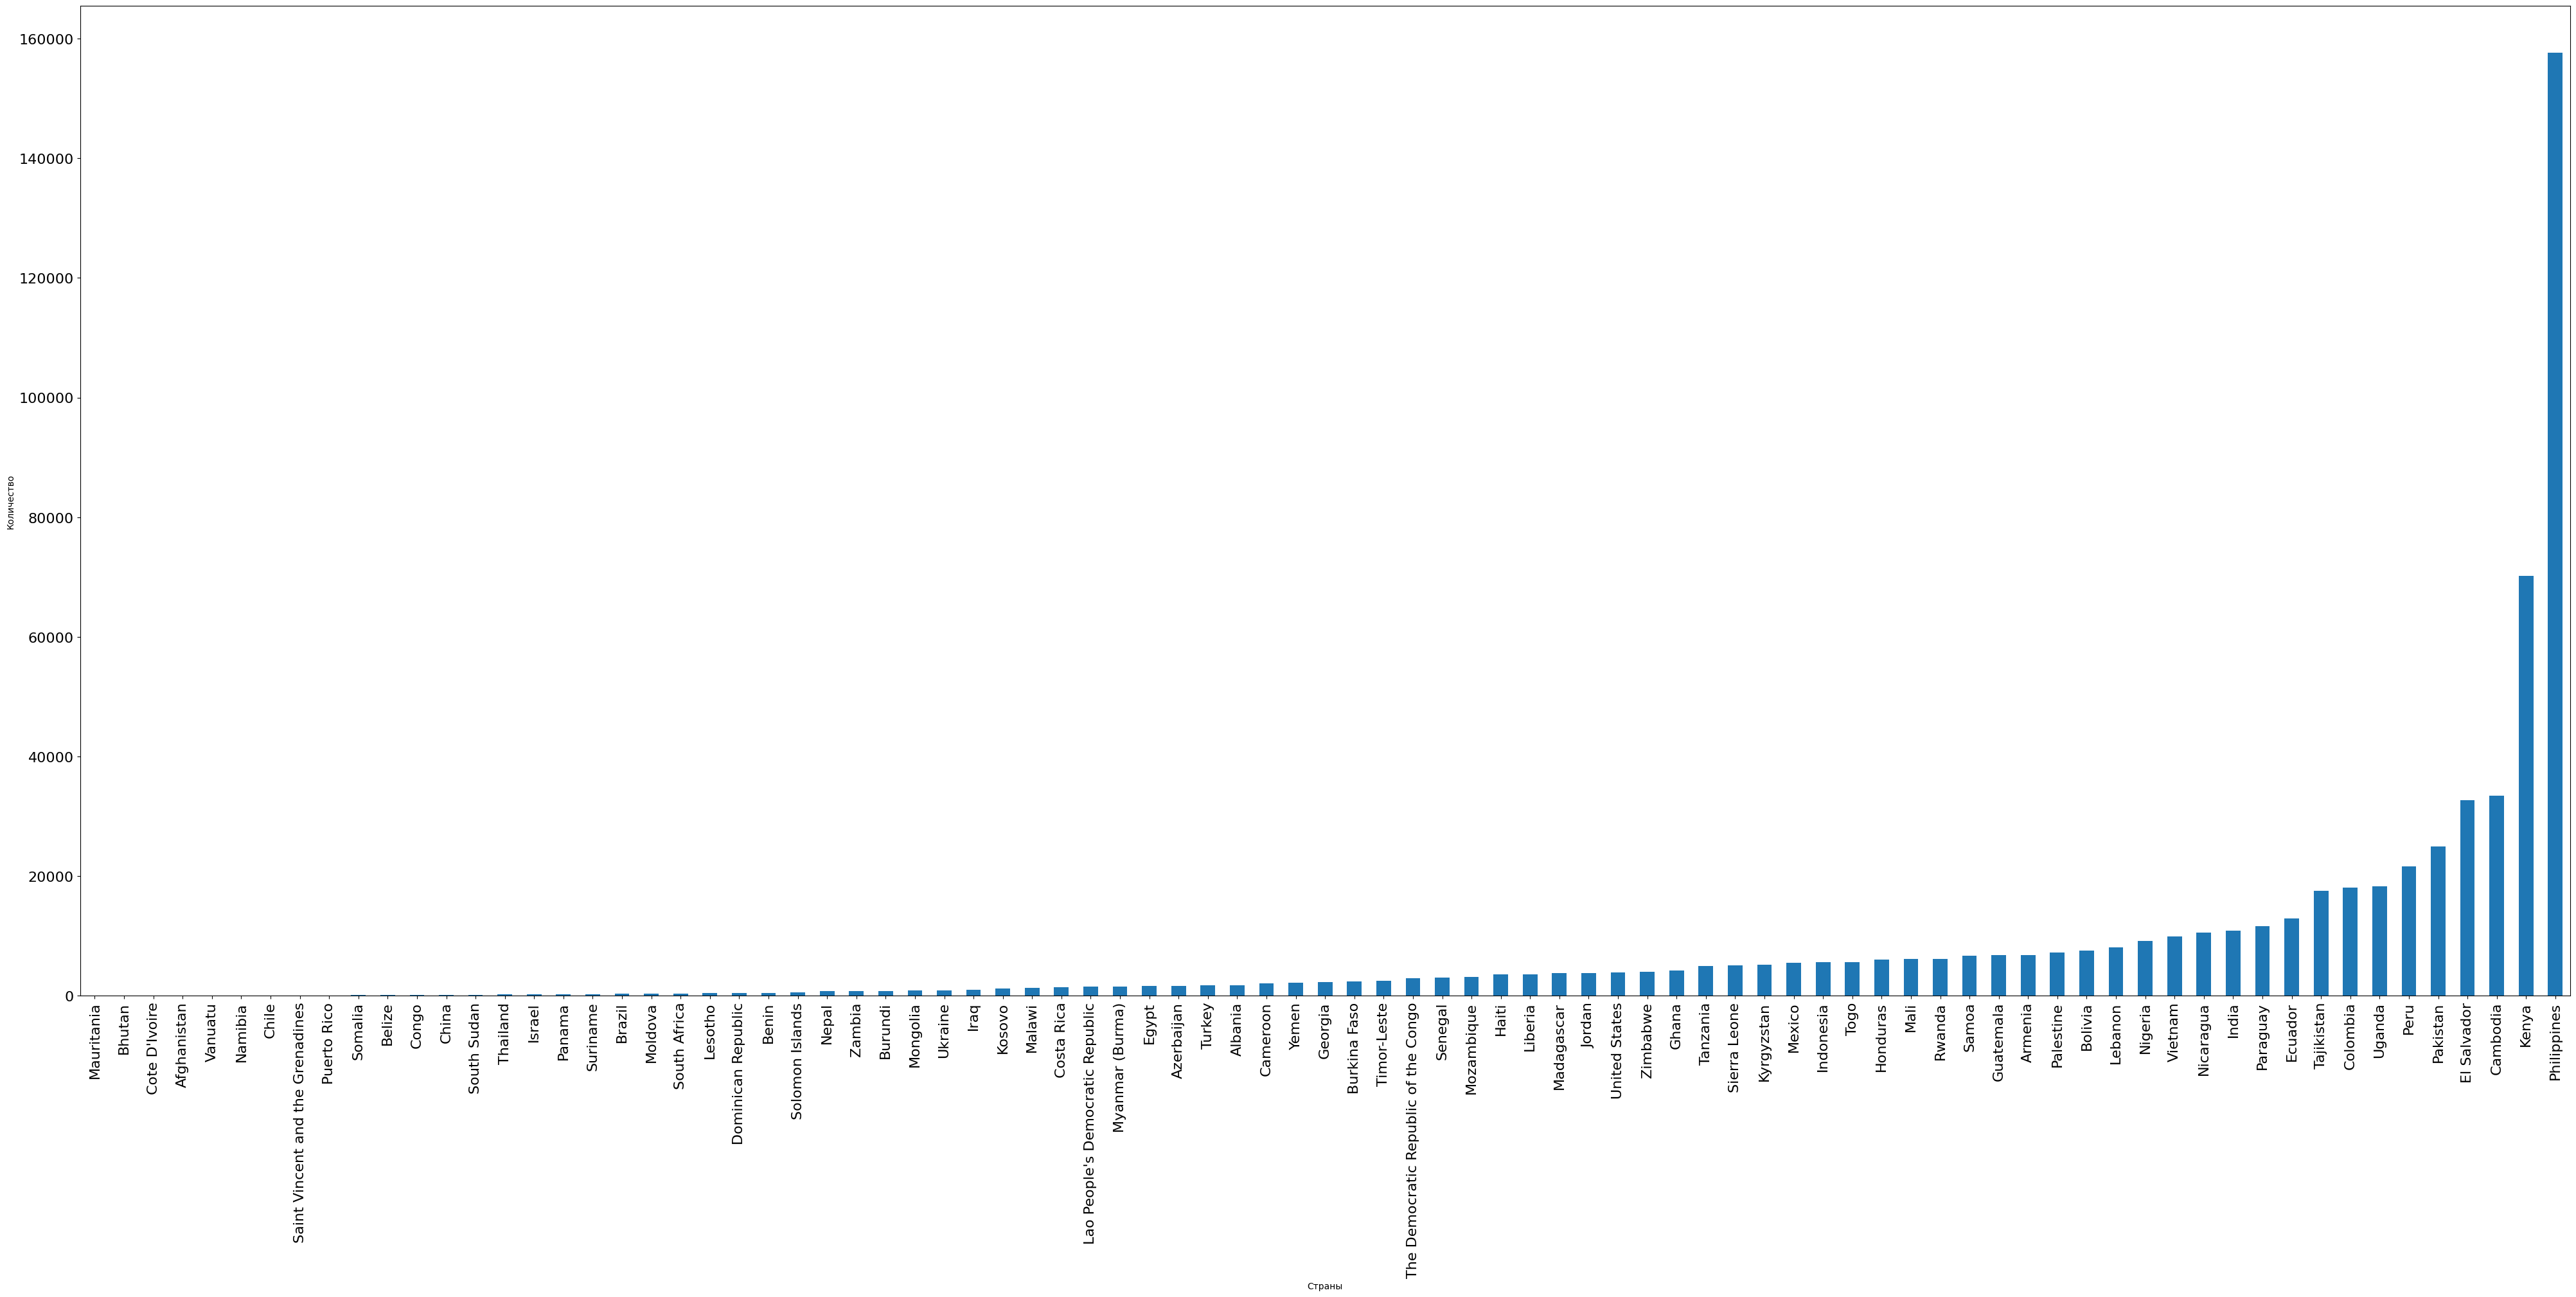

In [ ]:
country = df.pivot_table(index = 'country', values = 'id', aggfunc= 'count').sort_values(by = 'id')
country.plot(kind = 'bar', figsize = (50,20), legend = False, fontsize = 16, ylabel = 'Количество', xlabel = 'Страны');

Абсолютным лидером по заявкам по странам оказались Филиппины - более 150 тысяч заявок. Дальше идут такие страны как: Кения, Камбоджа, Сальвадор, Пакистан. Может быть это как-то связано с индексом бедности. Дальнейший анализ покажет. \
Самыми скромными странами оказались Мавритания, Бутан, Кот Дивуар, Афганистан и Намибия.

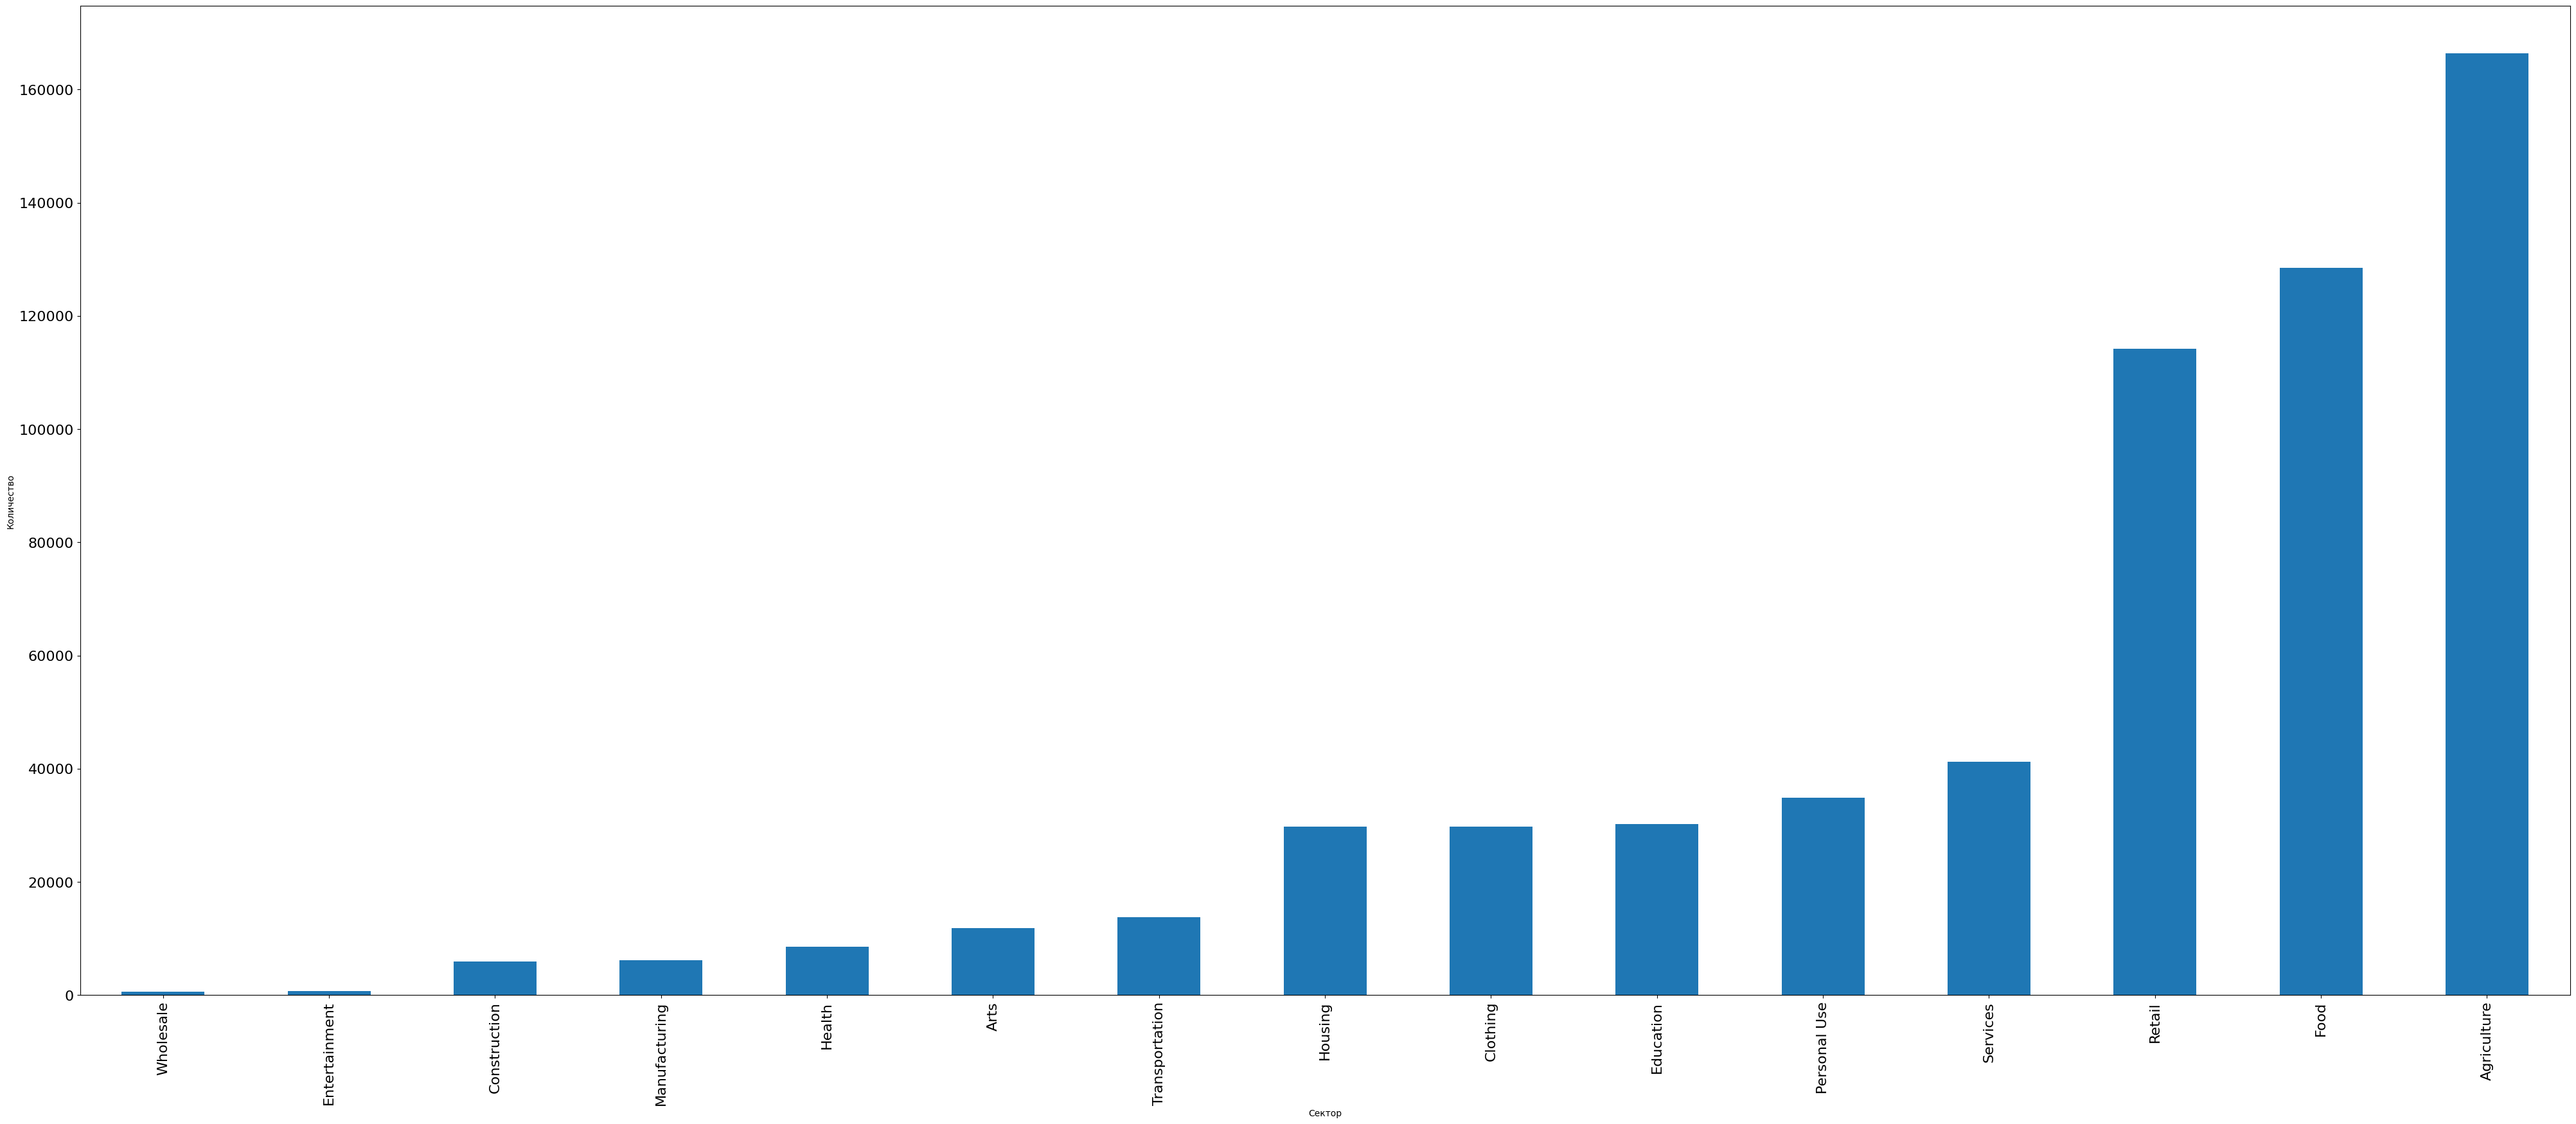

In [ ]:
sector = df.pivot_table(index = 'sector', values = 'id', aggfunc= 'count').sort_values(by = 'id')
sector.plot(kind = 'bar', figsize = (50,20), legend = False, fontsize = 16, ylabel = 'Количество', xlabel = 'Сектор');

График секторов показывает, что в основном людям требуются деньги для развития сельского хозяйства, пищевого сектора, а также розничная торговля. Как ни странно, для более серьезных вещей, как оптовая торговля, производство и даже здоровье либо плохо финансируются (в наборе данных только закрытые заявки), либо не интересуют большинство пользователей платформы.

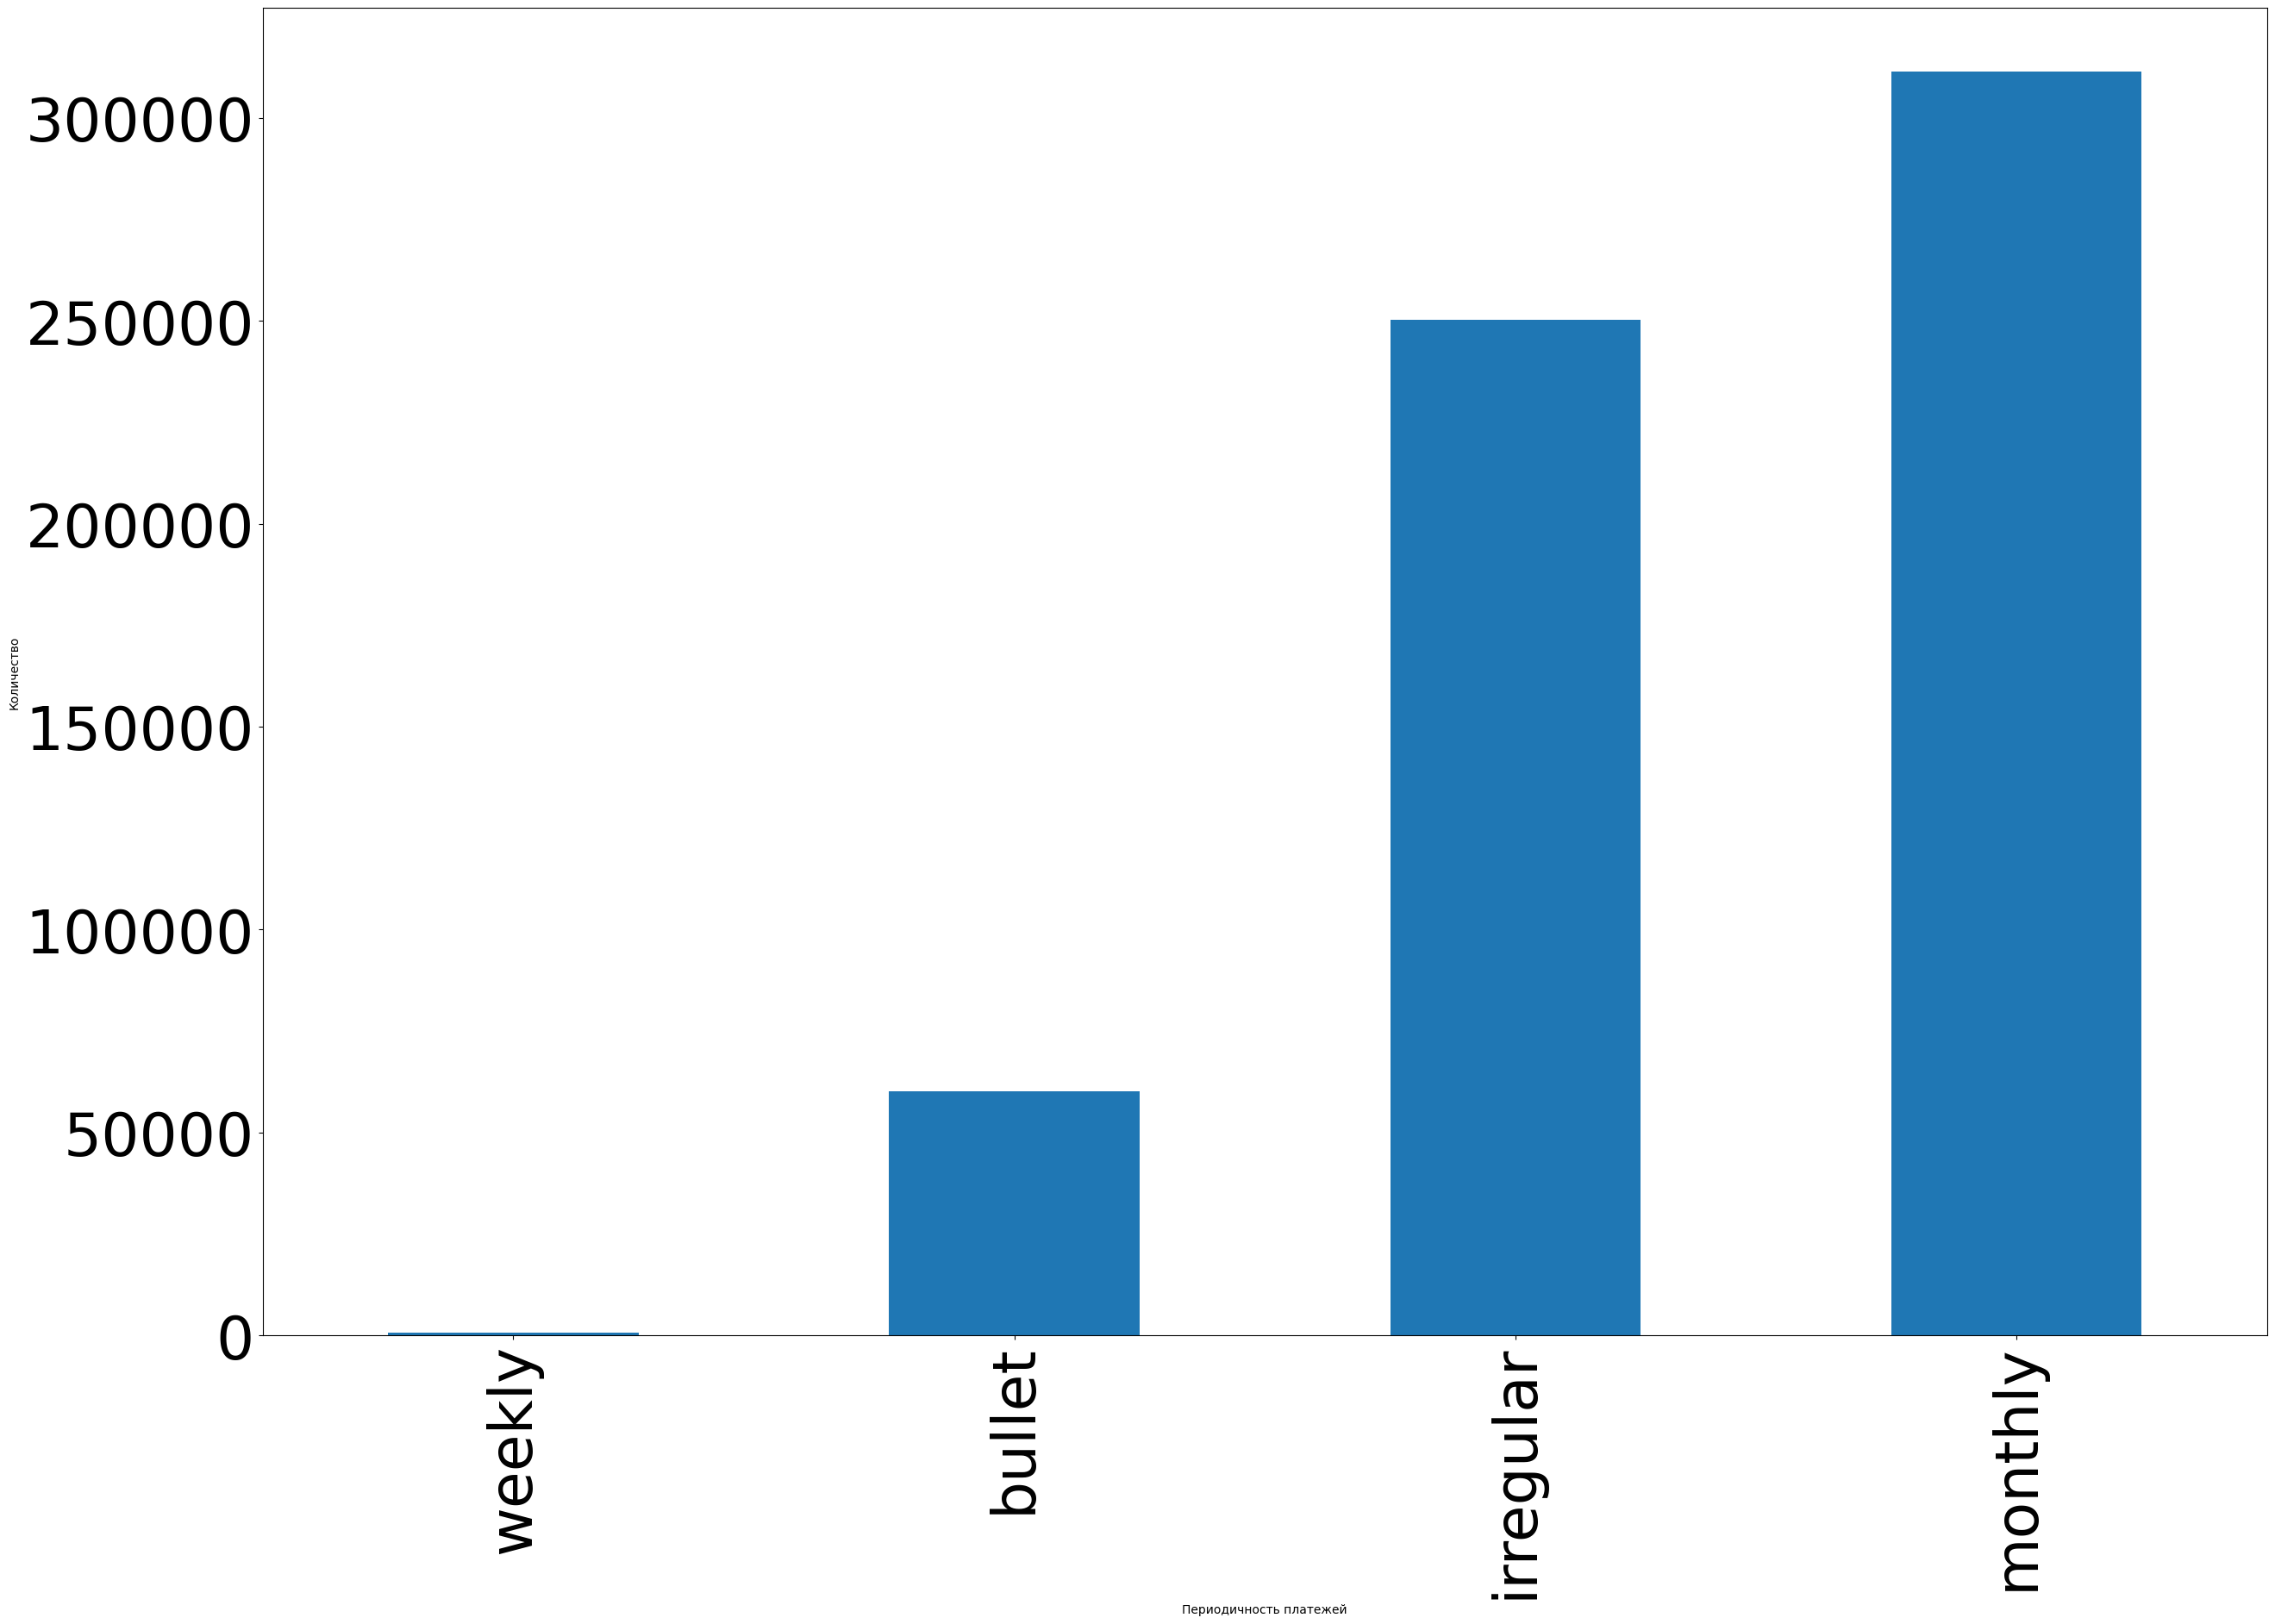

In [ ]:
repayment = df.pivot_table(index = 'repayment_interval', values = 'id', aggfunc= 'count').sort_values(by = 'id')
repayment.plot(kind = 'bar', figsize = (30,20), legend = False, fontsize = 50, ylabel = 'Количество', xlabel = 'Периодичность платежей');

Результат вполне ожиидаем, люди предпочитают оплачивать кредиты либо помесячно, либо дифференцированно. Первый способ более удобен тем, что человек знает сколько ему нужно платить каждый месяц, чтобы не образовывалось долгов. Дифференцированный платеж интересен, когда люди не хотят растягивать кредит на долгий срок и пытаются погашать его по мере возможности. Единовременный платеж и еженедельный малоинтересны, так как для первого случая нужен стабильный еженедельный доход, что встречается довольно редко, а для единовременного платежа нужно либо копить сумму, либо продавать бизнес, либо искать другой источник финансирования.

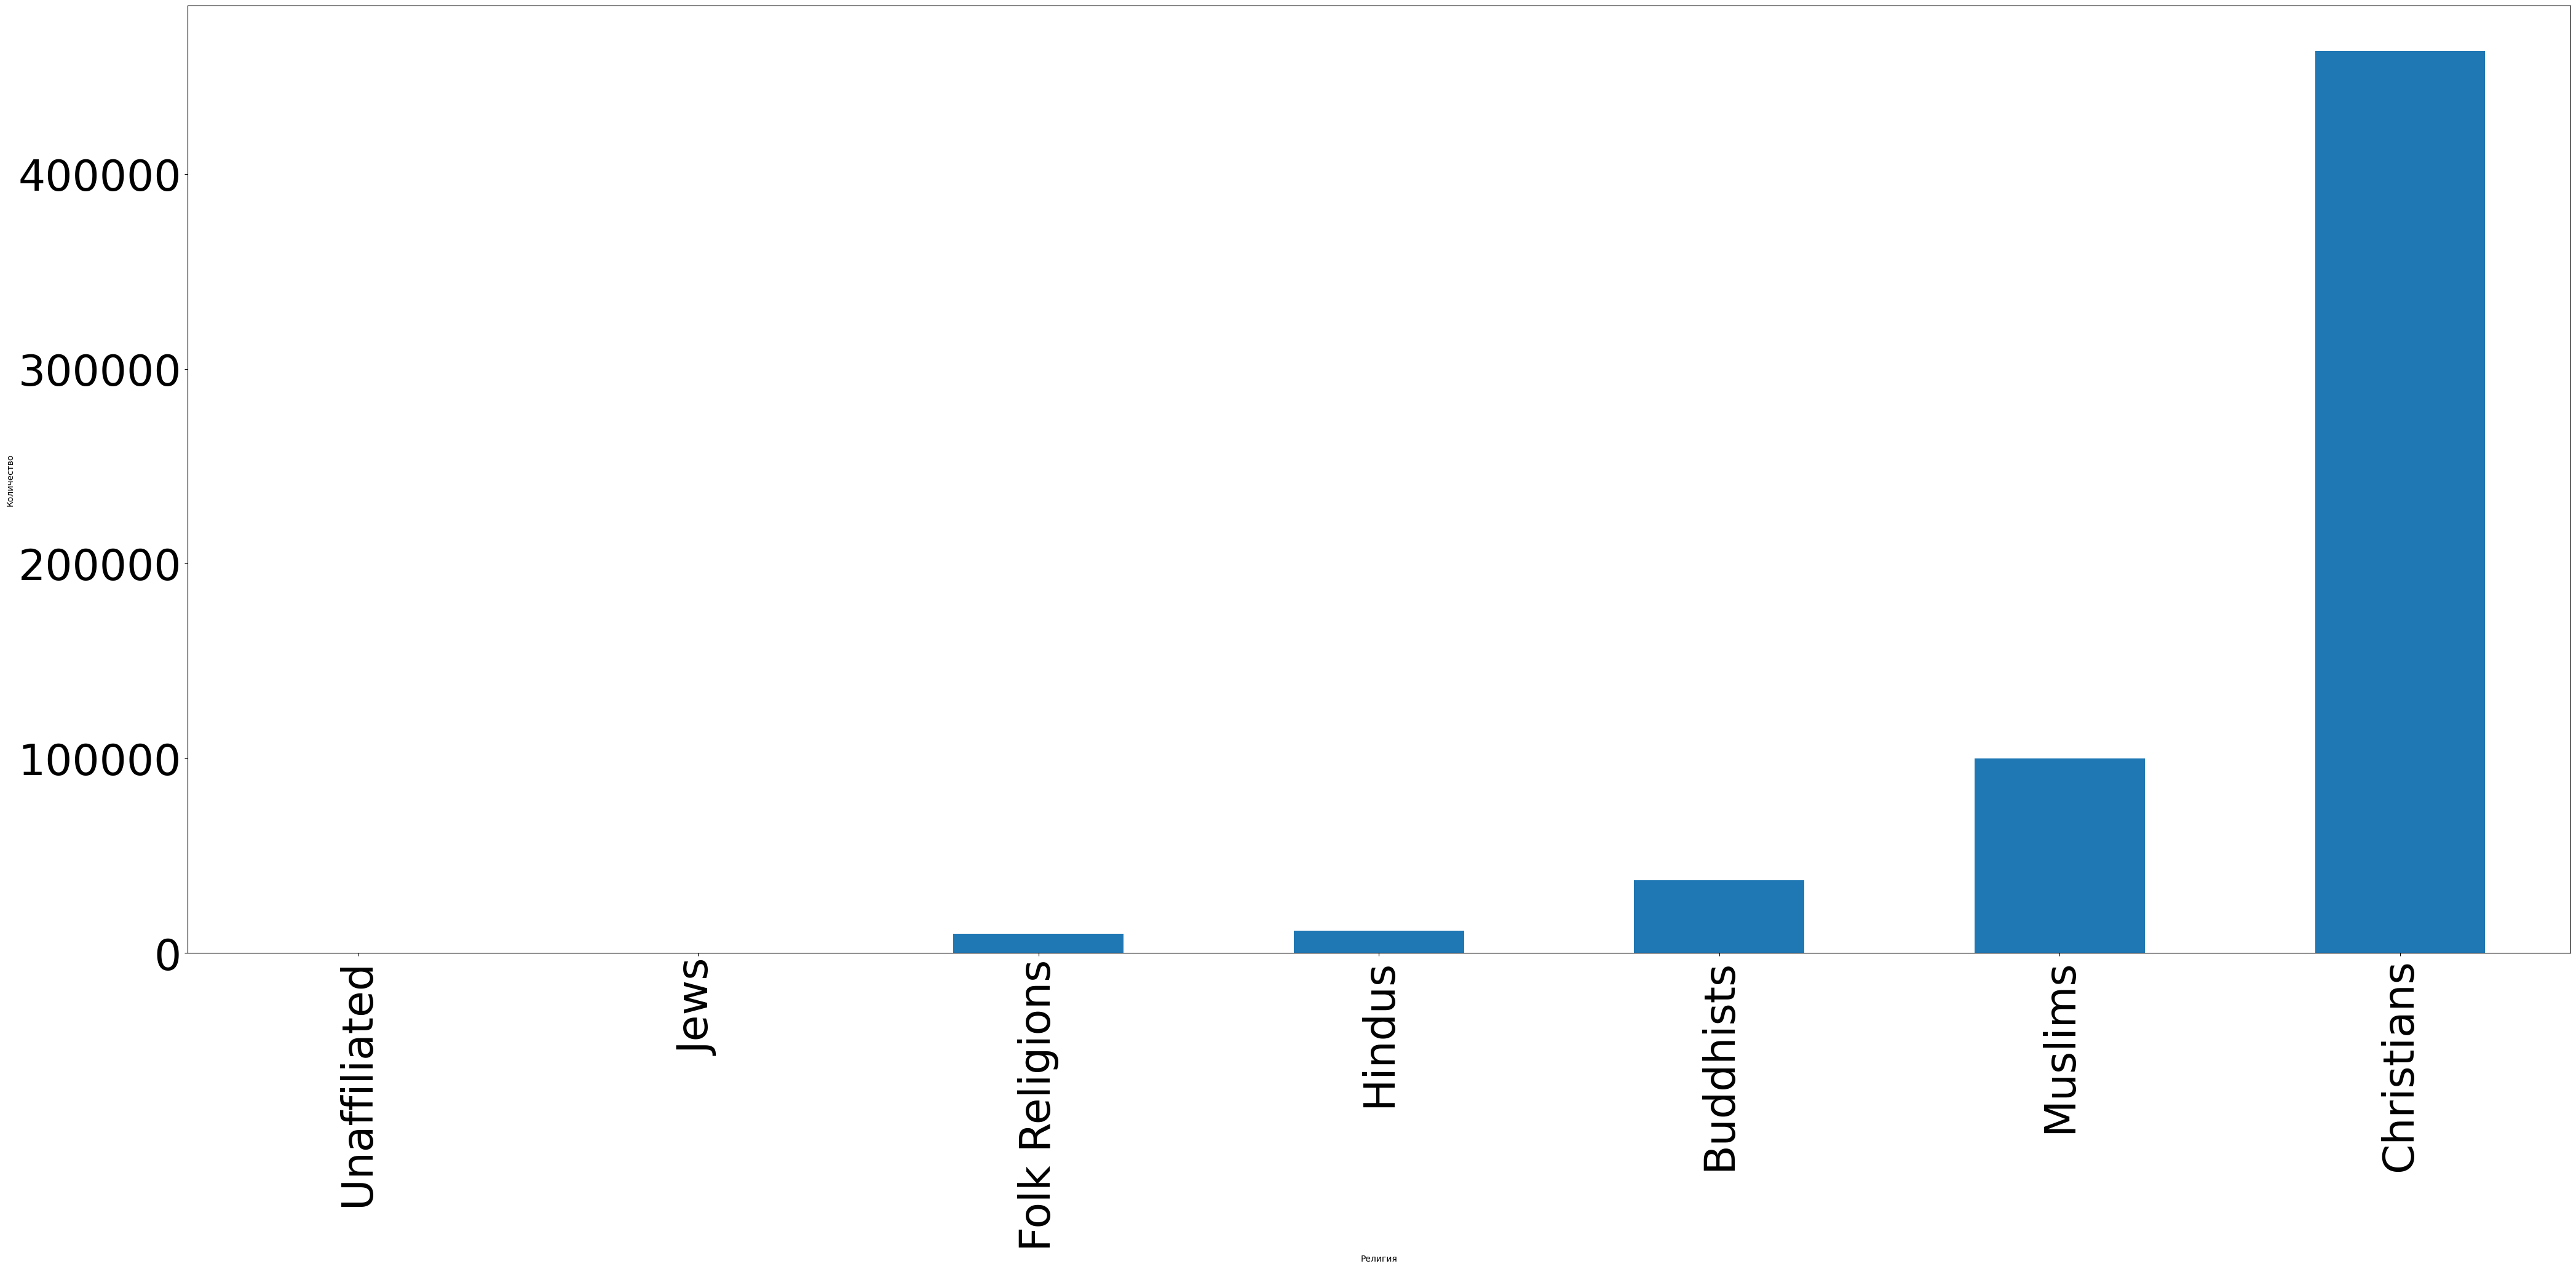

In [ ]:
religion = df.pivot_table(index = 'main_country_religion', values = 'id', aggfunc= 'count').sort_values(by = 'id')
religion.plot(kind = 'bar', figsize = (50,20), legend = False, fontsize = 50, ylabel = 'Количество', xlabel = 'Религия');

Сразу видно, что Филиппины и сальвадор сыграли свою роль в распределении основных религий. Христианство вырывается вперед, в то время как мусульманство оказалось на втором месте с огромным отставанием.

Для дальнейшего анализа нужно взглянуть на таблицу корреляции, чтобы понять, какие закономерности присутствуют в датафрейме.

In [ ]:
df.corr()

<ipython-input-50-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count,male,female
id,1.000000,-0.038738,-0.038738,0.126150,-0.069202,-0.088515,0.007923,0.006960
funded_amount,-0.038738,1.000000,1.000000,-0.097263,0.155676,0.848924,0.204981,0.472188
loan_amount,-0.038738,1.000000,1.000000,-0.097263,0.155676,0.848924,0.204981,0.472188
partner_id,0.126150,-0.097263,-0.097263,1.000000,0.110678,-0.025762,0.088221,-0.033046
term_in_months,-0.069202,0.155676,0.155676,0.110678,1.000000,0.241742,-0.028331,-0.150723
lender_count,-0.088515,0.848924,0.848924,-0.025762,0.241742,1.000000,0.181151,0.260247
male,0.007923,0.204981,0.204981,0.088221,-0.028331,0.181151,1.000000,0.176835
female,0.006960,0.472188,0.472188,-0.033046,-0.150723,0.260247,0.176835,1.000000


Результаты получились неоднозначными. \
С одной стороны, видно, что наблюдается высокая зависимость запрашиваемой суммы от количества заемщиков. Это объяснимо. Чем крупнее проект, тем больше людей над ним работает и, соответственно, больше денег требуется. \
С другой стороны видна слабая зависимость между запрашиваемой суммой и количеством женщин в заявке. Это очень странно, ведь пол не может оказывать влияние на необходимую сумму. Возможно данная взаимосвязь связана с каким-нибудь другим признаком.

In [ ]:
df.describe()

### Скорость анализа сбора средств


### Анализ заявок и индекса бедности